<a href="https://colab.research.google.com/github/Garvit-Batra/Car-Price-Predictor-/blob/main/GitHub_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
vehicle = pd.read_csv("/content/Quikr_car.csv")
vehicle = vehicle.drop(['Unnamed: 0'],axis=1)
vehicle.head()

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [ ]:
vehicle.shape

(1032, 9)

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1032 non-null   object
 1   Label       1032 non-null   object
 2   Location    1030 non-null   object
 3   Price       1032 non-null   object
 4   Kms_driven  1032 non-null   object
 5   Fuel_type   1032 non-null   object
 6   Owner       740 non-null    object
 7   Year        1032 non-null   int64 
 8   Company     1032 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.7+ KB


In [ ]:
backup = vehicle.copy()

In [ ]:
vehicle['Name'].unique()

array(['Ford Figo Duratec Petrol EXI 1.2 - 2015',
       'Maruti Suzuki Wagon R VXI BS IV - 2016',
       'Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018',
       'Hyundai Venue - 2019', 'Honda Jazz - 2017', 'Hyundai i20 - 2013',
       'Maruti Suzuki Swift Dzire VXi 1.2 BS IV - 2015',
       'Toyota Corolla Altis VL AT - 2017', 'Honda Amaze - 2013',
       'Hyundai Elite i20 Asta 1.2 - 2017',
       'Maruti Suzuki Alto 800 Vxi O  - 2018', 'Honda Jazz - 2018',
       'Maruti Suzuki Baleno - 2016', 'Jeep Compass - 2017',
       'Maruti Suzuki Alto K10 Vxi O AMT - 2017', 'Kia Seltos - 2019',
       'Toyota Innova 2.5 VX BS III 7 STR - 2012',
       'Hyundai Elite i20 ASTA 1.2 O  - 2016',
       'Hyundai Creta 1.6 CRDI SX PLUS AUTO - 2019', 'Kia Seltos - 2020',
       'Maruti Suzuki Ciaz DELTA 1.4 VVT - 2017',
       'Ford EcoSport Titanium 1.5L Ti VCT - 2019',
       'Tata Nano Twist XT - 2014',
       'Audi Q7 3.0 TDI quattro Premium Plus - 2011',
       'Ford Ecosport - 2017', 'Hyundai G

In [ ]:
vehicle['Label'].unique()

array(['PLATINUM', 'GOLD'], dtype=object)

In [ ]:
vehicle['Location'].unique()

array(['Bangalore', 'Chennai', 'Pune', 'Hyderabad', 'Faridabad',
       'Kanchipuram', 'Kozhikode', 'Kolkata', 'Mumbai', 'Lucknow',
       'Coimbatore', 'Delhi', 'Nanded', 'Malappuram', 'Chandigarh',
       'Madurai', 'BolpurSantiniketan', 'Bhubaneswar', nan, 'Pondicherry',
       'Udaipur', 'NaviMumbai', 'Gurgaon', 'Kurnool', 'Surat',
       'Ahmedabad', 'Jaipur', 'Thane', 'Nagpur', 'Dwarka', 'GirSomnath',
       'Anand', 'Muzaffarnagar', 'Trichy', 'Uttarpara', 'Kochi',
       'Dhanbad', 'Mahasamund', 'Bilaspur', 'Jagdalpur'], dtype=object)

In [ ]:
vehicle['Owner'].unique()

array([nan, ' 2nd Owner', ' 1st Owner', ' 3rd Owner'], dtype=object)

In [ ]:
vehicle['Company'].unique()

array(['Ford', 'Maruti', 'Hyundai', 'Honda', 'Toyota', 'Jeep', 'Kia',
       'Tata', 'Audi', 'Renault', 'BMW', 'Nissan', 'MG', 'Mahindra',
       'Volkswagen', 'Volvo', 'Skoda', 'Jaguar', 'Mercedes', 'Ssangyong',
       'Fiat', 'Chevrolet', 'Datsun', 'Land', 'Porsche'], dtype=object)

In [ ]:
vehicle['Year'].unique()

array([2015, 2016, 2018, 2019, 2017, 2013, 2012, 2020, 2014, 2011, 2021,
       2010, 2001, 2022, 2000, 2008, 2005, 2007, 2006, 2004, 2002, 2009,
       2003])

In [ ]:
vehicle['Price'].unique()

array(['₹3,80,000', '₹4,65,000', '₹13,50,000', '₹10,19,699', '₹7,13,499',
       '₹3,91,099', '₹4,74,299', '₹12,52,999', '₹3,93,699', '₹7,30,899',
       '₹3,43,099', '₹7,07,599', '₹6,88,899', '₹14,21,599', '₹3,99,999',
       '₹14,73,299', '₹10,25,000', '₹7,35,000', '₹6,00,000', '₹8,00,000',
       '₹7,00,000', '₹8,20,000', '₹1,95,000', '₹18,50,000', '₹8,07,499',
       '₹5,22,999', '₹7,40,899', '₹11,41,999', '₹9,71,299', '₹6,40,999',
       '₹6,76,199', '₹5,62,399', '₹5,80,899', '₹7,70,999', '₹5,31,399',
       '₹3,67,299', '₹4,12,199', '₹14,60,099', '₹6,18,699', '₹4,85,000',
       '₹8,90,000', '₹2,45,000', '₹9,45,000', '₹5,90,000', '₹4,95,000',
       '₹4,75,000', '₹12,00,000', '₹4,90,199', '₹9,20,999', '₹5,54,399',
       '₹4,08,999', '₹12,48,299', '₹6,36,099', '₹4,52,699', '₹7,04,399',
       '₹5,53,599', '₹9,99,599', '₹6,84,699', '₹6,20,399', '₹5,49,899',
       '₹8,12,899', '₹6,56,699', '₹7,25,000', '₹37,00,000', '₹3,65,000',
       '₹2,80,000', '₹8,40,000', '₹8,18,599', '₹8,62

In [ ]:
vehicle['Fuel_type'].unique()

array([' Petrol', ' Petrol ', ' Diesel ', ' Diesel', ' Electric ', ' CNG',
       ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG '], dtype=object)

In [ ]:
vehicle['Kms_driven'].unique()

array(['35,056 kms ', '44,000 kms ', '42,917 kms ', '16,112 kms ',
       '30,988 kms ', '69,163 kms ', '42,859 kms ', '34,919 kms ',
       '44,940 kms ', '13,687 kms ', '29,848 kms ', '21,426 kms ',
       '68,177 kms ', '70,650 kms ', '25,730 kms ', '47,096 kms ',
       '1,31,000 kms ', '26,000 kms ', '58,460 kms ', '48,000 kms ',
       '26,600 kms ', '36,000 kms ', '39,500 kms ', '76,000 kms ',
       '23,698 kms ', '37,860 kms ', '91,830 kms ', '31,172 kms ',
       '3,243 kms ', '9,616 kms ', '30,249 kms ', '60,875 kms ',
       '25,740 kms ', '38,587 kms ', '3,108 kms ', '35,353 kms ',
       '34,748 kms ', '2,359 kms ', '17,814 kms ', '68,934 kms ',
       '72,600 kms ', '81,000 kms ', '80,000 kms ', '12,000 kms ',
       '6,000 kms ', '56,000 kms ', '15,840 kms ', '32,482 kms ',
       '1,13,779 kms ', '26,150 kms ', '34,555 kms ', '30,880 kms ',
       '70,423 kms ', '30,232 kms ', '50,077 kms ', '18,482 kms ',
       '10,246 kms ', '25,021 kms ', '70,646 kms ', '45,490 kms

In [ ]:
vehicle=vehicle[vehicle['Price']!="Ask For Price"]
vehicle['Price']= vehicle['Price'].str.replace(',','')
vehicle['Price']= vehicle['Price'].str.replace('₹','').astype(int)
vehicle['Price'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 380000,  465000, 1350000, 1019699,  713499,  391099,  474299,
       1252999,  393699,  730899,  343099,  707599,  688899, 1421599,
        399999, 1473299, 1025000,  735000,  600000,  800000,  700000,
        820000,  195000, 1850000,  807499,  522999,  740899, 1141999,
        971299,  640999,  676199,  562399,  580899,  770999,  531399,
        367299,  412199, 1460099,  618699,  485000,  890000,  245000,
        945000,  590000,  495000,  475000, 1200000,  490199,  920999,
        554399,  408999, 1248299,  636099,  452699,  704399,  553599,
        999599,  684699,  620399,  549899,  812899,  656699,  725000,
       3700000,  365000,  280000,  840000,  818599,  862399,  673599,
        528899,  527999,  791699,  392999,  690199,  474699, 2019899,
        562299, 1400999,  447599, 1814599,  920399,  390000,  650000,
        575000,  525000, 1000000,  325000, 3000000,  343299, 1711499,
        918799,  526399,  881099, 1764199,  639199, 1917599,  466599,
       1397699,  504

In [ ]:
vehicle['Kms_driven'] = vehicle['Kms_driven'].str.split(' ').str.get(0).str.replace(',','').astype(int)

In [ ]:
vehicle = vehicle[~vehicle['Location'].isna()]

In [ ]:
vehicle['Name']=vehicle['Name'].str.split(' ').str.slice(0,3).str.join(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vehicle = vehicle[~vehicle['Owner'].isna()]

In [ ]:
vehicle = vehicle.reset_index(drop=True)
vehicle

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2nd Owner,2019,Hyundai
1,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2nd Owner,2017,Honda
2,Hyundai i20 -,PLATINUM,Pune,391099,69163,Diesel,2nd Owner,2013,Hyundai
3,Maruti Suzuki Swift,PLATINUM,Pune,474299,42859,Petrol,2nd Owner,2015,Maruti
4,Toyota Corolla Altis,PLATINUM,Pune,1252999,34919,Petrol,1st Owner,2017,Toyota
...,...,...,...,...,...,...,...,...,...
732,Ford Figo Aspire,PLATINUM,Pune,481399,29632,Petrol,2nd Owner,2017,Ford
733,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,1st Owner,2014,Hyundai
734,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,1st Owner,2017,Jeep
735,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,1st Owner,2017,Jeep


In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        737 non-null    object
 1   Label       737 non-null    object
 2   Location    737 non-null    object
 3   Price       737 non-null    int64 
 4   Kms_driven  737 non-null    int64 
 5   Fuel_type   737 non-null    object
 6   Owner       737 non-null    object
 7   Year        737 non-null    int64 
 8   Company     737 non-null    object
dtypes: int64(3), object(6)
memory usage: 51.9+ KB


In [ ]:
vehicle.shape

(737, 9)

In [ ]:
vehicle.describe() #only numerical values

,Price,Kms_driven,Year
count,7.370000e+02,737.000000,737.000000
mean,6.798567e+05,42865.037992,2016.645862
std,3.803285e+05,28514.239221,2.299152
min,7.300000e+04,700.000000,2001.000000
25%,4.470990e+05,22667.000000,2015.000000
50%,5.725990e+05,36277.000000,2017.000000
75%,7.788880e+05,58492.000000,2018.000000
max,3.300000e+06,210000.000000,2022.000000


In [ ]:
vehicle[vehicle['Price']>2e6]  #cars having price > 20 lakh
vehicle[vehicle['Price']<1e5]  #car having price < 1 lakh

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
85,Honda City 1.5,GOLD,Lucknow,73000,195000,Petrol,2nd Owner,2001,Honda


In [ ]:
vehicle.to_csv('Cleaned_vehicle.csv')

In [ ]:
# X = vehicle.drop(columns='Price')
# y = vehicle['Price']

# **Regression Analysis using Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression     #Linear Regression model 
from sklearn.metrics import r2_score                  #amount of variation in output variable ; metric to determine how good a model is 1 means perfect , 0 means worst and -ve means ambiguous 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
ohe = OneHotEncoder(sparse=False)
XXX = ohe.fit_transform(vehicle[['Name','Label','Location','Company','Fuel_type','Owner']])
#'Name','Label','Location','Kms_driven','Company','Fuel_type','Owner','Year'

In [ ]:
XX = np.array(vehicle.drop(['Name','Label','Location','Company','Fuel_type','Owner'],axis=1))
y = np.array(vehicle['Price'])
scaler = StandardScaler()
scaler.fit(XX)
XX = scaler.transform(XX)
y = scaler.fit_transform(y.reshape(-1,1))
XX = pd.DataFrame(XX)
y = pd.DataFrame(y)
X = np.concatenate([XXX,XX],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)  #0.2 means 20% for test 80% for training

In [ ]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print(y_pred)
print(y_pred.shape)
res = scaler.inverse_transform(y_pred)
res

[[ 2.50064917e-01]
 [-5.61100583e-01]
 [-7.60011098e-01]
 [ 2.78380600e+00]
 [-6.12669976e-01]
 [-4.34808193e-01]
 [-7.99740580e-01]
 [-6.98969776e-01]
 [-8.69779007e-02]
 [-6.25036106e-01]
 [ 3.44105265e+00]
 [-2.54052209e-01]
 [-3.45087974e-01]
 [ 3.50046392e-01]
 [ 1.48641480e+00]
 [ 2.37910502e-02]
 [ 1.29276647e+00]
 [-4.61119108e-01]
 [ 2.82953560e-01]
 [ 3.04823069e+00]
 [-8.24999058e-01]
 [-6.00040737e-01]
 [ 1.89739392e+00]
 [ 7.66811281e-01]
 [ 2.94798611e+00]
 [ 8.16750625e-02]
 [-7.94215288e-01]
 [ 4.07141077e-01]
 [-1.62091070e-01]
 [ 3.26398019e+00]
 [-8.22104857e-01]
 [-8.16171772e-01]
 [ 2.36120132e-01]
 [-1.10920833e-01]
 [ 7.90227995e-01]
 [ 8.16015323e-01]
 [-8.08949400e-01]
 [ 2.89813054e-01]
 [ 2.94267253e-01]
 [-4.53392745e-01]
 [ 3.00542760e-03]
 [-1.60983499e+00]
 [-5.77676460e-01]
 [ 1.98232415e-01]
 [-2.42318417e-01]
 [-4.93744642e-01]
 [-2.36423896e-01]
 [ 2.69934797e+00]
 [-8.85514162e-01]
 [-5.14267155e-01]
 [-1.30201331e+00]
 [-1.95115760e-01]
 [-2.7562715

array([[ 774899.        ],
       [ 466599.        ],
       [ 390999.        ],
       [1737899.        ],
       [ 446999.        ],
       [ 514599.        ],
       [ 375899.        ],
       [ 414199.        ],
       [ 646799.        ],
       [ 442299.        ],
       [1987699.        ],
       [ 583299.        ],
       [ 548699.        ],
       [ 812899.        ],
       [1244799.        ],
       [ 688899.        ],
       [1171199.        ],
       [ 504599.        ],
       [ 787399.        ],
       [1838399.        ],
       [ 366299.        ],
       [ 451799.        ],
       [1401000.        ],
       [ 971299.        ],
       [1800299.        ],
       [ 710899.        ],
       [ 377999.        ],
       [ 834599.        ],
       [ 618250.70733554],
       [1920399.        ],
       [ 367399.        ],
       [ 369653.9901105 ],
       [ 769599.        ],
       [ 637699.        ],
       [ 980199.        ],
       [ 990000.        ],
       [ 372399.        ],
 

In [ ]:
#Evaluation Metrics
print(r2_score(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.999907231731041
0.010008360955251342


# **Regression Analysis using K Nearest Neighbours(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
error = []
for k in range(1,20):
  clf = KNeighborsRegressor(k)
  clf_model = clf.fit(X_train,y_train)
  y_pred = clf_model.predict(X_test)
  error.append(r2_score(y_test, y_pred))

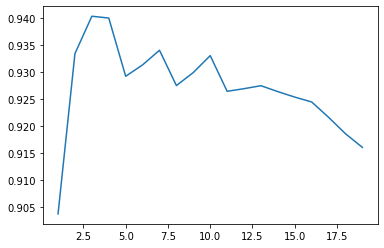

In [ ]:
plt.plot(range(1, 20), error)

In [ ]:
clf = KNeighborsRegressor(3)
clf_model = clf.fit(X_train,y_train)
y_pred = clf_model.predict(X_test)
res = scaler.inverse_transform(y_pred)
res

array([[ 727899.        ],
       [ 436765.66666667],
       [ 405832.33333333],
       [1576799.        ],
       [ 451332.33333333],
       [ 534565.66666667],
       [ 415399.33333333],
       [ 458465.66666667],
       [ 676365.66666667],
       [ 439199.        ],
       [1786232.33333333],
       [ 616599.        ],
       [ 522099.        ],
       [ 879899.        ],
       [ 986932.33333333],
       [ 655465.66666667],
       [ 943799.        ],
       [ 461065.66666667],
       [ 727899.        ],
       [1874499.        ],
       [ 392399.        ],
       [ 463599.        ],
       [1417733.        ],
       [1038332.33333333],
       [1839032.33333333],
       [ 690832.33333333],
       [ 429632.33333333],
       [ 652632.33333333],
       [ 696765.66666667],
       [1874499.        ],
       [ 331332.33333333],
       [ 506562.33333333],
       [ 932865.66666667],
       [ 692832.33333333],
       [ 846432.33333333],
       [ 866629.33333333],
       [ 456932.33333333],
 

In [ ]:
#Evaluation Metrics
print(r2_score(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.9403235868917041
0.25384264792300515


# **Regression Analysis using SVM**

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred.shape
y_pred = np.reshape(y_pred,(len(y_pred),1))
res2 = scaler.inverse_transform(y_pred)
res2

array([[ 736300.26499279],
       [ 444224.61460405],
       [ 385991.41885596],
       [1752118.7582823 ],
       [ 426614.70580903],
       [ 569909.96485804],
       [ 355602.00358206],
       [ 392467.71007932],
       [ 632967.01108005],
       [ 492499.36407354],
       [1808199.89972968],
       [ 543967.22442403],
       [ 541132.87164024],
       [ 805703.62270836],
       [1247787.22226408],
       [ 686346.85292935],
       [1201795.56731115],
       [ 529163.90900386],
       [ 752024.07448617],
       [1835025.36788652],
       [ 354583.04746292],
       [ 456890.63542007],
       [1394746.96683486],
       [ 954598.80421093],
       [1828849.12325819],
       [ 696849.97488193],
       [ 413372.65644963],
       [ 820020.8764936 ],
       [ 618611.39613978],
       [1842499.84950823],
       [ 340918.86133611],
       [ 423396.88857764],
       [ 737583.3433847 ],
       [ 611536.65723896],
       [ 999568.08626632],
       [ 972481.36464934],
       [ 393994.57021053],
 

In [ ]:
#Evaluation Metrics
print(r2_score(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

0.9406492492210944
0.253149073412131
